<a href="https://colab.research.google.com/github/Mr-Premanand/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [3]:
#Import the libraries required for further operations of EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# locating/reading the data file for analysis
file_location="/content/drive/MyDrive/Airbnb Bookings Analysis-Premanand Gaikwad/Airbnb NYC 2019.csv"
df=pd.read_csv(file_location)

In [6]:
# Checking the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- From above information it is seen that data contains:

  Rows = 48895 

  Column = 16 ,  i.e we have 16 informational variables by which we can analyse

In [8]:
# checking the number of null data in each columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- From above null values information,  it seen that columns 'name' & 'host_name' contain less number of null values as compare to null values in the columns 'last_review' & 'reviews_per_month'. 
- So we will replace the null values in the columns 'name' & 'host_name' with the "Unavailable"
- As columns 'last_review' & 'reviews_per_month' contain so many null values so from them we cant conclude any beneficial information so that we willdrop them

In [9]:
#Dropping the columns 'last_review' & 'reviews_per_month'
df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)

In [10]:
# Replacing the null values in columns of 'name' & 'host_name' with "Unavailable"
df["name"].fillna("Unavailable",inplace=True)        # replacing null values of 'name' column
df["host_name"].fillna("Unavailable",inplace=True)    # replacing null values of 'host_name' column

In [11]:
# Now check the any null value present in data
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- As seen above, we have cleaned the data.
### Now, let's begine to find some important infomation
   
   we have to first analyse the which host is the busy, for that we will  compare the host with the different variables i.e columns
  
  1.Analyse based on the total number of reviews

In [12]:
# Grouping the host_id and number_of reviews to obtain the total number of reviews for perticular host id
busy_host1=df.groupby("host_id")["number_of_reviews"].sum().sort_values(ascending=False).reset_index()

# Again grouping the host id and host name to obatin the name of perticular host id(owner)
owner_name=df.groupby("host_id")["host_name"].unique().reset_index()

# Now merge above both dataframe based on the host id and get top 10 id
busy_host_id1=pd.merge(busy_host1,owner_name, on="host_id", how="left").set_index("host_id").iloc[0:10]
busy_host_id1


,number_of_reviews,host_name
host_id,,
37312959,2273,[Maya]
344035,2205,[Brooklyn& Breakfast -Len-]
26432133,2017,[Danielle]
35524316,1971,[Yasu & Akiko]
40176101,1818,[Brady]
4734398,1798,[Jj]
16677326,1355,[Alex And Zeena]
6885157,1346,[Randy]
219517861,1281,[Sonder (NYC)]


Text(0, 0.5, ' Total number of reviews')

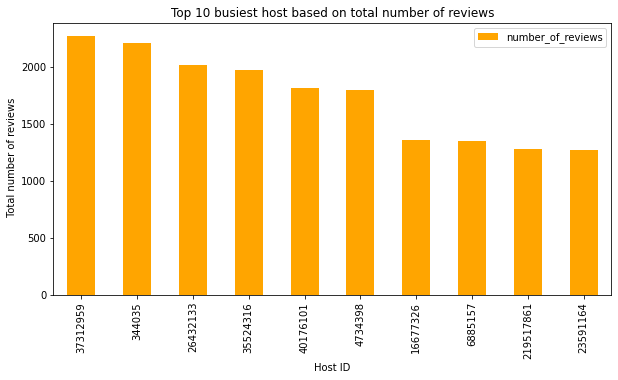

In [13]:
# Now plot the abov result using bar graph
plt.rcParams['figure.figsize'] = (10, 5)      # defining the size of the graph
busy_host_id1.plot.bar(color="orange")
plt.title("Top 10 busiest host based on total number of reviews")
plt.xlabel("Host ID")
plt.ylabel(" Total number of reviews")

Result 1:
By considering total number of reviews:

Host-ID=37312959 

Host_name=Maya  is the busiest host



2. Analyse based on the number of reviews

In [14]:
# Grouping the host_id and number_of reviews to obtain the number of reviews for perticular host id
busy_host2=df.groupby("host_id")["number_of_reviews"].count().sort_values(ascending=False).reset_index()

# Again grouping the host id and host name to obatin the name of perticular host id(owner)
owner_name=df.groupby("host_id")["host_name"].unique().reset_index()

# Now merge above both dataframe based on the host id and get top 10 id
busy_host_id2=pd.merge(busy_host2,owner_name, on="host_id", how="left").set_index("host_id").iloc[0:10]
busy_host_id2

,number_of_reviews,host_name
host_id,,
219517861,327,[Sonder (NYC)]
107434423,232,[Blueground]
30283594,121,[Kara]
137358866,103,[Kazuya]
16098958,96,[Jeremy & Laura]
12243051,96,[Sonder]
61391963,91,[Corporate Housing]
22541573,87,[Ken]
200380610,65,[Pranjal]


Text(0, 0.5, ' Number of reviews')

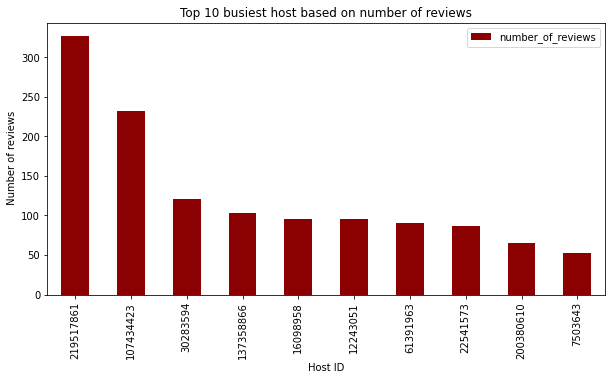

In [15]:
# Now plot the abov result using bar graph
plt.rcParams['figure.figsize'] = (10, 5)      # defining the size of the graph
busy_host_id2.plot.bar(color="darkred")
plt.title("Top 10 busiest host based on number of reviews")
plt.xlabel("Host ID")
plt.ylabel(" Number of reviews")

Result 2:
By considering number of reviews:

Host-ID= 219517861

Host_name= Sonder  is the busiest host

3. Analyse based on number of properties listed

In [16]:
#Grouping the host_id and name of property to obatin number of properties listed by perticular owner(host)
busy_host3=df.groupby("host_id")["name"].count().sort_values(ascending=False).reset_index()

#Grouping the host id to obatin the host name
owner_name=df.groupby("host_id")["host_name"].unique().reset_index()

#Now merge both above dataframe to obtain the top 10 host of higher number of properties listed
busy_host_id3=pd.merge(busy_host3,owner_name, on="host_id", how="left").set_index("host_id").iloc[0:10]
busy_host_id3


,name,host_name
host_id,,
219517861,327,[Sonder (NYC)]
107434423,232,[Blueground]
30283594,121,[Kara]
137358866,103,[Kazuya]
16098958,96,[Jeremy & Laura]
12243051,96,[Sonder]
61391963,91,[Corporate Housing]
22541573,87,[Ken]
200380610,65,[Pranjal]


Text(0, 0.5, ' Number of properties')

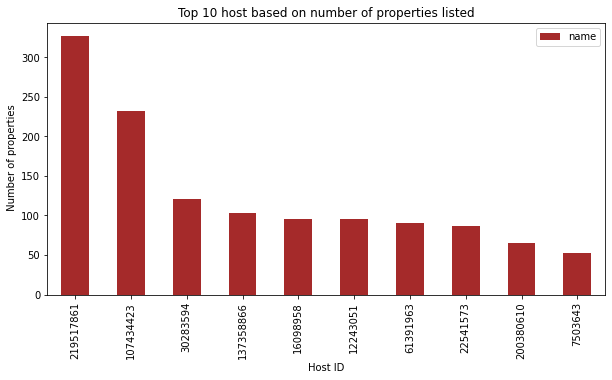

In [17]:
# Now plot theabove result
plt.rcParams['figure.figsize'] = (10, 5)      # defining the size of the graph
busy_host_id3.plot.bar(color="brown")
plt.title("Top 10 host based on number of properties listed")
plt.xlabel("Host ID")
plt.ylabel(" Number of properties")

Result 3:
By considering number of properties listed:

Host-ID= 219517861

Host_name= Sonder  listed highest number of properties (327 properties)

## Conlusion1:

From above can conclude that 

Host-id/Name =219517861/Sonder  &  37312959/Maya 

are the busies host i.e this host has maximum number of customer

- Now we will analyse which neighbourhhood group has max number of listing and its prices according to that 

1. Check which neighbourhood group has max number of booking

In [18]:
#checking max booking area i.e neighbourhood group
busy_neighbourhood_group= df["neighbourhood_group"].value_counts()
busy_neighbourhood_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc941506c50>],
      dtype=object)

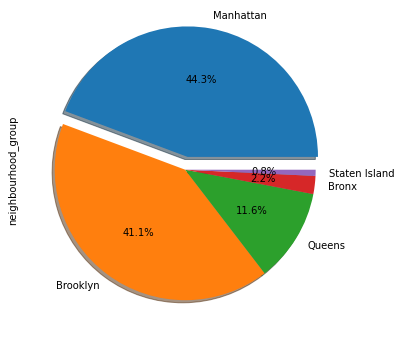

In [19]:
# now plot the above result by using percentage share and show ceparate max share area
busy_neighbourhood_group.plot.pie(subplots=True,figsize=(12,6),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)


Result 1

from aboveit is seen that Manhattan is the maximum  airbnb booking city

2. Now analyse booking price in the neighbourhood group

In [20]:
#Calculating the average booking price by neighbourhood group
mean_bookingprice_of_group=df.groupby("neighbourhood_group")["price"].mean().reset_index(name="Avg booking price")
mean_bookingprice_of_group

,neighbourhood_group,Avg booking price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


Text(0.5, 1.0, 'Average booking price in neighbourhood group')

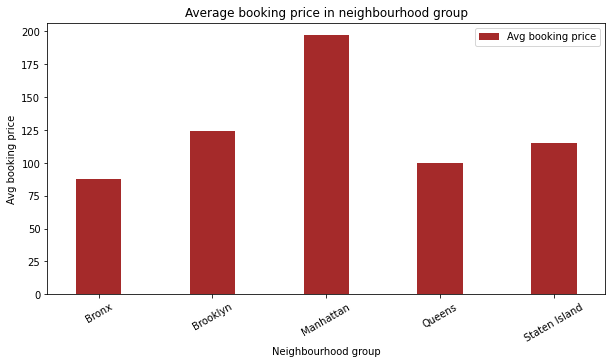

In [33]:
#now plot the above result
mean_bookingprice_of_group.plot.bar(x="neighbourhood_group", y="Avg booking price", width=0.4,color="brown")
plt.xticks(rotation=30)
plt.xlabel("Neighbourhood group")
plt.ylabel("Avg booking price")
plt.title("Average booking price in neighbourhood group")

Result 2

From above it is seen that booking in the 'Manhattan' is the quite expensive

3. Now analyse the room type preffered in the neighborhood group

In [44]:
# grouping the neighbourhood group and room type 
room_type_preffered=df.groupby("neighbourhood_group")["room_type"].value_counts().unstack()
room_type_preffered

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0, 0.5, 'No of booking')

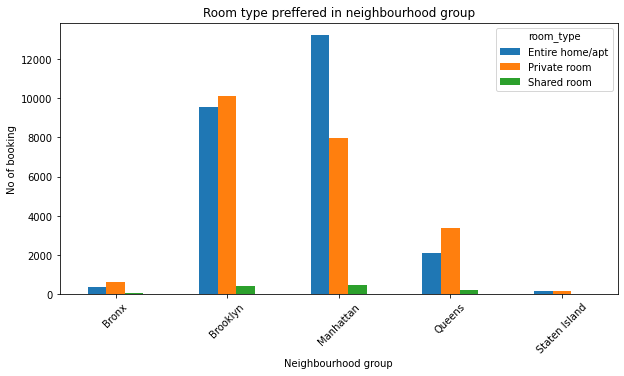

In [54]:
# plot the above result
room_type_preffered.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Room type preffered in neighbourhood group")
plt.xlabel('Neighbourhood group')
plt.ylabel('No of booking')

Text(0.5, 1.0, 'Room type wise booking preference in groups')

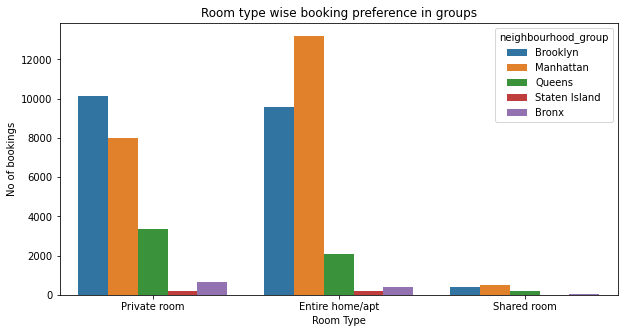

In [57]:
# obatin the abve result 
sns.countplot(x="room_type",hue="neighbourhood_group",data=df)
plt.xlabel("Room Type")
plt.ylabel("No of bookings")
plt.title("Room type wise booking preference in groups")

Result 3

From above results, it is seen that in Manhattan group of cities, customer prefer to stay in 'Entire home/apt', and in Brooklyn group o cities customer prefer to stay in 'Private Room'

- Now we will analyse cities/neighbourhood which has most airbnb bookings and its relation with above results

1. Obtain the max airbnb booking cities and its neighbourhood group

In [22]:
# busiest city/neighbourhood i.e high traffic city 
most_visited_city=df.groupby(["neighbourhood_group"])["neighbourhood"].value_counts().reset_index(name="count").nlargest(10,"count")
most_visited_city

,neighbourhood_group,neighbourhood,count
48,Brooklyn,Williamsburg,3920
49,Brooklyn,Bedford-Stuyvesant,3714
95,Manhattan,Harlem,2658
50,Brooklyn,Bushwick,2465
96,Manhattan,Upper West Side,1971
97,Manhattan,Hell's Kitchen,1958
98,Manhattan,East Village,1853
99,Manhattan,Upper East Side,1798
51,Brooklyn,Crown Heights,1564
100,Manhattan,Midtown,1545


[Text(0, 0.5, 'No of bookings'),
 Text(0.5, 0, 'Neighbourhood Group'),
 Text(0.5, 1.0, 'Most airbnb booking City with respect to top 2 group')]

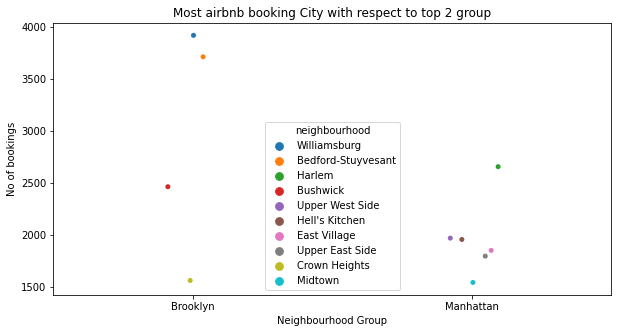

In [74]:
#plot the above most airbnb booked city in newyork data
ax=sns.stripplot(x="neighbourhood_group", y="count",hue="neighbourhood", data=most_visited_city)
ax.set(title="Most airbnb booking City with respect to top 2 group", xlabel="Neighbourhood Group",ylabel="No of bookings")

Result 1

From above results it is seen that Williamsburg city has max number of booking and its belongs to Brooklyn neighbourhood group and  from Manhattan group harlem is the max number of booking

Price distribution analysis in different neighbourhood groups

Text(0, 0.5, 'Price')

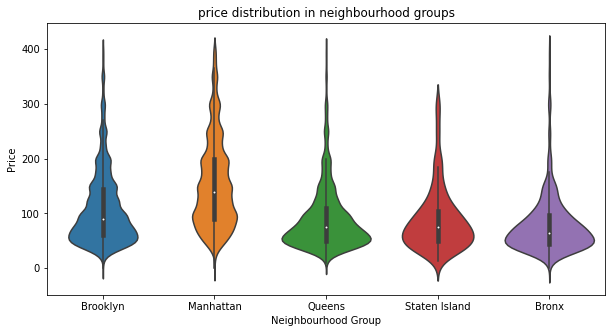

In [63]:
#plot distribution using violin plot
sns.violinplot(x="neighbourhood_group",y="price", data=df[df["price"]<400])
plt.title("Price distribution in neighbourhood groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

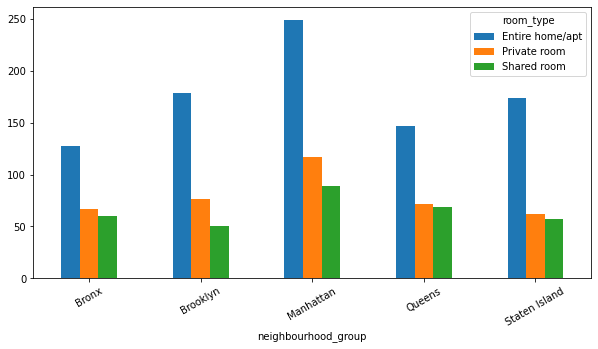

In [69]:
avgprice_roomtype=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avgprice_roomtype.plot.bar()
plt.xticks(rotation=30)